<a href="https://colab.research.google.com/github/MisterGusMan/IGTI_Bootcamp_ML/blob/main/Trabalho_Pr%C3%A1tico_do_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook será usado para responder as perguntas propostas pelo teste Trabalho Prático do Módulo 1. A análise oficial foi feita no notebook **trabalho_pratico_FAM**.

In [ ]:
import pandas as pd  
import numpy as np 
from matplotlib import pyplot as plt  
import seaborn as sns 
%matplotlib inline

In [ ]:
df_consultas=pd.read_csv('KaggleV2-May-2016.csv')
df_consultas.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df_consultas.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# 1. Qual é a proporção aproximada de pacientes que compareceram à consulta?

In [ ]:
df_consultas.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df_consultas['No-show'].value_counts(normalize = True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

Como a coluna `No-Show` define se o paciente não compareceu à consulta, temos que aproximadamente 80% compareceram (No), enquanto 20% não compareceram.

# 2. Quantas instâncias e atributos existem no dataset, respectivamente?

In [ ]:
df_consultas.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df_consultas.shape

(110527, 14)

Utilizando o método `.shape`, vemos que nosso DF apresenta 110527 linhas (instâncias) e 14 colunas (atributos).

# 3. Qual das colunas do dataset possui valores nulos?

In [ ]:
print(df_consultas.isnull().values.any())
print(df_consultas.isna().values.any())

False
False


Como podemos ver, as colunas não apresentam valores nulos.

# 4. Qual é a idade média dos pacientes?

In [ ]:
df_consultas['Age'].mean()

37.08887421173107

# 5. Em quantas localidades diferentes (Neighbourhood) os pacientes residem?

In [ ]:
df_consultas['Neighbourhood'].nunique()

81

# 6. Comparando apenas a identificação do paciente (PatientId) com o número dos agendamentos das consultas (AppointmentID), o que podemos inferir?

In [250]:
print('Valores únicos por coluna:\n')
for colunas in list(df_consultas.columns):
  print("{0:25} {1}".format(colunas, df_consultas[colunas].nunique()))

Valores únicos por coluna:

PatientId                 62298
AppointmentID             110526
Gender                    2
ScheduledDay              103548
AppointmentDay            27
Age                       103
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


Como podemos ver, a coluna PatientId (ID do paciente) possui quase metade da quantidade de valores únicos de AppointmentID (ID da consulta). Com isso, podemos inferir que houveram pacientes que marcaram 2 ou mais consultas.

# 7. Quantas variáveis binárias (apenas dois valores) existem no dataset?

In [ ]:
bin = []
for col in df_consultas.columns:
  if df_consultas[col].nunique() == 2:
    bin.append(col)
print(len(bin), bin)

7 ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']


# 8. Quantos valores diferentes encontramos para a variável dos SMS recebidos (SMS_received)?

In [ ]:
df_consultas['SMS_received'].nunique()

2

# 9. Qual é a menor e maior idade, respectivamente, presente no dataset?

In [ ]:
print(df_consultas['Age'].min(), df_consultas['Age'].max())

-1 115


In [ ]:
# Retirando idades negativas do DF:
df_consultas = df_consultas[df_consultas['Age']>=0]
df_consultas.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
print(df_consultas['Age'].min(), df_consultas['Age'].max())

0 115


# 10. Qual foi o tipo de transformação dos dados categóricos realizado?

Na análise original, nós tranformamos as variáveis `categóricas` (Valores não-inteiros) em variáveis `binárias` (0 ou 1). Isto é feito durante a filtragem de dados para gerar valores compatíveis para as features, pois não-inteiros não podem ser utilizados para treinar o modelo. O tipo de transformação utilizada foi a `Label Encoding`, onde os valores categóricos são substituidos por números inteiros entre 0 e (quantidade de classes - 1). 

# 11. Qual é a proporção de pacientes que receberam o SMS e NÃO compareceram?

In [ ]:
# Substituindo dados categóricos
categoricas = ['Neighbourhood','Gender','No-show']
for coluna in categoricas:
  df_consultas[coluna] = pd.Categorical(df_consultas[coluna]).codes
df_consultas.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


Text(0, 0.5, 'Frequência')

<Figure size 720x432 with 0 Axes>

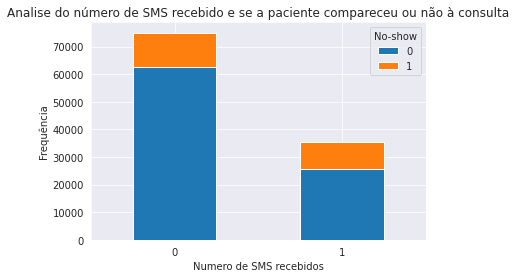

In [ ]:
plt.figure(figsize=(10,6))
sms_no_show = df_consultas.groupby(['SMS_received', 'No-show'])['SMS_received'].count().unstack('No-show')
sms_no_show[[0, 1]].plot(kind='bar', stacked=True) 
plt.title('Analise do número de SMS recebido e se a paciente compareceu ou não à consulta') 
plt.xticks(rotation = 0)
plt.xlabel('Numero de SMS recebidos') 
plt.ylabel('Frequência')

In [248]:
sms_no_show[1][1]/sms_no_show.values[1].sum()*100

27.574544839637

# 12. Qual região possui o maior número de consultas marcadas?

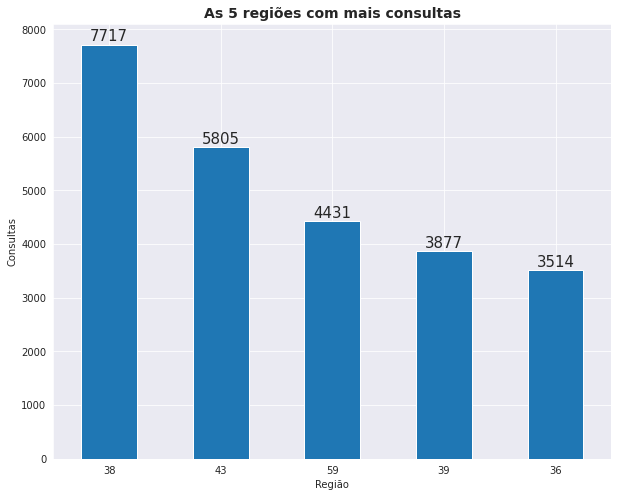

In [ ]:
plt.figure(figsize = (10,8))
regioes = df_consultas['Neighbourhood'].value_counts().head()
c = regioes.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Região')
plt.ylabel('Consultas')
plt.title('As 5 regiões com mais consultas', fontsize = 14, fontweight = 'bold')
for bar in c.patches:
    c.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# 13. Qual foi a acurácia obtida com a aplicação do modelo?

Como podemos ver no `Classification Report` da análise original:


```
   precision       recall    f1-score  support

           0       0.83      0.84      0.83     26485
           1       0.33      0.31      0.32      6673

    accuracy                           0.73     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.73      0.73     33158

```
Portanto, nosso modelo obteve uma acurácia de 0.73 ou 73%.


# 14. Sobre o modelo presente no trabalho prático, é CORRETO afirmar:

O modelo árvore de decisão (DecisionTreeClassifier) é um modelo supervisionado (input e output incluídos), onde os dados são continuamente separados por um certo parâmetro. Por isso, a alternativa 


```
Representa um modelo supervisionado e a acurácia obtida foi superior a 60%
```
está correta.


# 15. Sobre a matriz de confusão para os dados de teste, é correto afirmar, EXCETO:

A matriz de confusão obtida foi:

```
[[22250  4235]
 [ 4593  2080]]
```
Como podemos ver, 26.485 instâncias pertencem a classe 0 (Compareceu). Portanto, a alternativa 


```
Mais de 26000 instâncias de teste pertencem à classe 0 (compareceram à consulta). 
```
está correta.

